# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
pip install citipy

Note: you may need to restart the kernel to use updated packages.


In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from datetime import datetime

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

603

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
# Base url
url = f"http://api.openweathermap.org/data/2.5/weather?units=imperial&appid={weather_api_key}&q="

# List of city data
cityData = []

# Grouping variables
# Group
set_count = 1
# Record within group
record = 1

print("Beginning Data Retrieval")
print("--------------------------------")

for i, city in enumerate(cities):
    # group the cities in sets of 50
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record = 1
        
    # Output the record and group being processed
    print(f"Processing Record {record} of Set {set_count} | {city}")
    
    # Increase record number in the set
    record += 1
    
    # Create URL that includes city
    cityURL = url + city
    
    # Call the OpenWeather API
    try:
        cityWeather = requests.get(cityURL).json()
        
        # Parse out data
        lat = cityWeather["coord"]["lat"]
        lng = cityWeather["coord"]["lon"]
        maxTemp = cityWeather["main"]["temp_max"]
        humidity = cityWeather["main"]["humidity"]
        cloudiness = cityWeather["clouds"]["all"]
        windspeed = cityWeather["wind"]["speed"]
        country = cityWeather["sys"]["country"]
        date = cityWeather["dt"]
        
        cityData.append({"City": city,
                        "Lat": lat,
                        "Lng": lng,
                        "Max Temp": maxTemp,
                        "Humidity": humidity,
                        "Cloudiness": cloudiness,
                        "Wind Speed": windspeed,
                         "Country": country, 
                        "Date": date})
    except:
        print(f"{city} not found. Skipping...")
        pass
    
    if i == 5:
        break

Beginning Data Retrieval
--------------------------------
Processing Record 1 of Set 1 | rio de janeiro
Processing Record 2 of Set 1 | pandan
Processing Record 3 of Set 1 | galesong
Processing Record 4 of Set 1 | attawapiskat
attawapiskat not found. Skipping...
Processing Record 5 of Set 1 | punta arenas
Processing Record 6 of Set 1 | hamilton


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
# Creates a data frame out of the raw data, and exports it as a csv
cityData_df = pd.DataFrame(cityData)
cityData_df.to_csv(output_data_file)

In [6]:
# Displays the data frame
cityData_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,rio de janeiro,-22.9028,-43.2075,73.40,73,40,5.75,BR,1619134580
1,pandan,14.0453,124.1694,82.38,77,65,6.44,PH,1619134844
2,galesong,-5.3166,119.3661,75.20,88,20,2.30,ID,1619134845
3,punta arenas,-53.1500,-70.9167,46.40,93,75,4.61,CL,1619134727
4,hamilton,39.1834,-84.5333,51.80,32,1,10.36,US,1619134656


In [7]:
cityData_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,5.00000,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000e+00
mean,-5.62814,8.975600,65.836000,72.600000,40.20000,5.892000,1.619135e+09
std,35.18507,104.049801,15.758886,24.089417,30.70342,2.950825,1.164101e+02
min,-53.15000,-84.533300,46.400000,32.000000,1.00000,2.300000,1.619135e+09
25%,-22.90280,-70.916700,51.800000,73.000000,20.00000,4.610000,1.619135e+09
50%,-5.31660,-43.207500,73.400000,77.000000,40.00000,5.750000,1.619135e+09
75%,14.04530,119.366100,75.200000,88.000000,65.00000,6.440000,1.619135e+09
max,39.18340,124.169400,82.380000,93.000000,75.00000,10.360000,1.619135e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [8]:
#  Get the indices of cities that have humidity over 100%.
index_humidity = cityData_df.index[cityData_df["Humidity"] >= 100].tolist()
index_humidity

[]

In [9]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data = cityData_df.drop(index_humidity)
clean_city_data.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,rio de janeiro,-22.9028,-43.2075,73.40,73,40,5.75,BR,1619134580
1,pandan,14.0453,124.1694,82.38,77,65,6.44,PH,1619134844
2,galesong,-5.3166,119.3661,75.20,88,20,2.30,ID,1619134845
3,punta arenas,-53.1500,-70.9167,46.40,93,75,4.61,CL,1619134727
4,hamilton,39.1834,-84.5333,51.80,32,1,10.36,US,1619134656


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

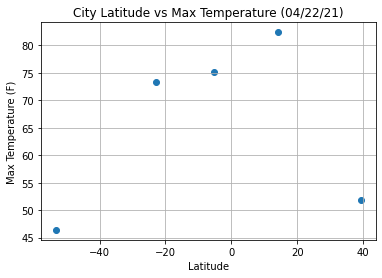

In [19]:
plt.scatter(x=clean_city_data["Lat"], y=clean_city_data["Max Temp"])
plt.title(f"City Latitude vs Max Temperature ({datetime.today().strftime('%m/%d/%y')})")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid()
plt.show()

## Latitude vs. Humidity Plot

## Latitude vs. Cloudiness Plot

## Latitude vs. Wind Speed Plot

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression